In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import load_iris

In [4]:
my_data= load_iris()

In [5]:
my_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
print(my_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
features= pd.DataFrame(my_data.data,columns=my_data.feature_names)

In [8]:
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
features.shape

(150, 4)

In [10]:
target= pd.DataFrame(my_data.target, columns=['Target'])

In [11]:
target

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(112, 4)
(112, 1)
(38, 4)
(38, 1)


In [14]:
knn= KNeighborsClassifier(n_neighbors=15)

In [15]:
knn.fit(x_train,y_train)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [16]:
y_pred= knn.predict(x_test)

In [17]:
y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1])

In [18]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [19]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 14]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

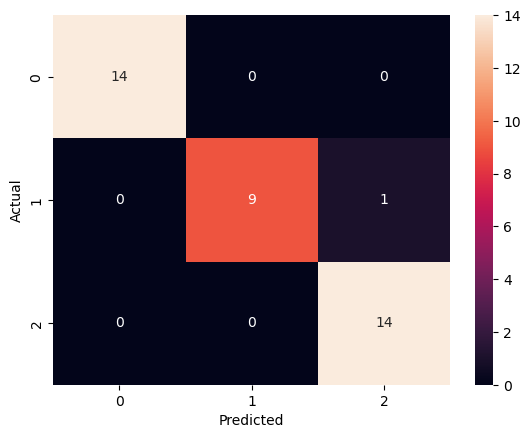

In [20]:
sns.heatmap(conf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [22]:
y_test.value_counts()

Target
0         14
2         14
1         10
dtype: int64

In [23]:
y_test.sum()

Target    38
dtype: int64

## Gridsearch

In [24]:
params= {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,12,20]}

In [25]:
grid_search= GridSearchCV(knn,params)

In [26]:
grid_search.fit(x_train,y_train)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=15),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12,
                                         20]})

In [27]:
grid_search.best_params_

{'n_neighbors': 3}

In [28]:
value= range(1,100)

In [29]:
params=dict(n_neighbors=value)

In [30]:
params

{'n_neighbors': range(1, 100)}

In [31]:
grid_search= GridSearchCV(knn,params)

In [32]:
grid_search.fit(x_train,y_train)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=15),
             param_grid={'n_neighbors': range(1, 100)})

In [33]:
grid_search.best_params_

{'n_neighbors': 15}

### Decision Tree

In [46]:
import math

In [47]:
((9/14)*(math.log((14/9),2))) + ((5/14)*(math.log((14/5),2)))

0.940285958670631

In [48]:
((3/7)*(math.log((7/3),2))) + ((4/7)*(math.log((7/4),2)))

0.9852281360342514

In [49]:
((6/7)*(math.log((7/6),2))) + ((1/7)*(math.log((7/1),2)))

0.5916727785823275